# Task 5 🚩
In this task, we use the [Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) dataset




## STEP 1:  Import Libraries & Load Data
----

In [ ]:
#import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mount drive to read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the csv file 
data = pd.read_csv('/content/drive/MyDrive/AI-Tasks/hotel_bookings.csv')

## STEP 2: Exploring Data
----

In [ ]:
# example: how many rows and columns are in the data?
data.shape

(119390, 32)

> there are 119390 row and 32 column 



In [ ]:
pd.set_option("display.max_columns", 100) #to change the default number of columns to be displayed
pd.set_option("display.max_rows", 50) #to change the default number of columns to be displayed
data.sample(5) #display random sample of dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
102975,City Hotel,0,61,2016,December,50,8,0,3,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8.0,NaN,0,Transient,93.60,0,1,Check-Out,2016-12-11
16291,Resort Hotel,0,148,2015,August,34,21,0,1,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,211.00,1,0,Check-Out,2015-08-22
111979,City Hotel,0,309,2017,May,19,13,2,3,3,0.0,0,BB,MOZ,Offline TA/TO,TA/TO,0,0,0,D,D,4,No Deposit,467.0,NaN,0,Transient-Party,124.10,0,0,Check-Out,2017-05-18
118,Resort Hotel,0,79,2015,July,27,4,4,6,2,1.0,0,HB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,250.0,NaN,0,Transient,149.00,0,1,Check-Out,2015-07-14
163,Resort Hotel,0,94,2015,July,28,6,1,3,3,0.0,0,BB,CN,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,96.0,NaN,0,Transient,171.32,0,1,Check-Out,2015-07-10


In [ ]:
data.info() #information about the data set columns, how many non null valueand data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.isnull().sum() #how many null value in each column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data.nunique() #the number of unique value in each column

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
data.duplicated().sum() #how many duplicated value

31994

> there is 31994 duplicated value




In [ ]:
data.describe() #data set describtion

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##Extra cell: Assess data
From the data exploring that we did above here is our note:

for example:

> ## There are duplicated values

> ## Unwanted columns
1.   arrival_date_week_number
2.   meal
1.   agent
1. company
1. market_segment
1. distribution_channel

> ## Nulls
1. children
2. country

> ## Wrong columns datatype
1. children
2. reserved_room_type
3. assigned_room_type
4. customer_type
5. deposit_type
1. reservation_status_date


> ## Add family column

> ## Seperation the day, month and year from reservation_status_date


## STEP 3: Clean Data
----



 ### 1. First problem: Drop duplicate values


> delete the 31994 duplicated value

In [ ]:
data.drop_duplicates(inplace=True) #drop

In [ ]:
data.shape #data shape after drop duplicated

(87396, 32)

> it is become 87396 row after delete the duplicated value

 ### 2. Second problem: Drop unwanted columns

In [ ]:
data.drop(columns=['company', 'arrival_date_week_number', 'meal', 'agent', 'market_segment', 'distribution_channel'], inplace=True) #delete 6 column

In [ ]:
data.sample(6) #the data set after solving the second problem

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
22822,Resort Hotel,0,0,2016,April,7,0,1,1,0.0,...,D,0,No Deposit,0,Transient,56.00,0,0,Check-Out,2016-04-08
86084,City Hotel,0,10,2016,March,22,0,5,2,0.0,...,A,0,No Deposit,0,Transient,160.00,0,0,Check-Out,2016-03-27
89565,City Hotel,0,10,2016,May,21,1,1,2,0.0,...,D,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2016-05-23
104395,City Hotel,0,23,2017,January,8,2,3,2,0.0,...,D,0,No Deposit,0,Transient,148.00,1,1,Check-Out,2017-01-13
105216,City Hotel,0,154,2017,January,27,2,4,2,2.0,...,F,0,No Deposit,0,Transient,143.84,0,1,Check-Out,2017-02-02
12049,Resort Hotel,1,58,2017,June,10,2,5,2,0.0,...,A,0,No Deposit,0,Transient,177.71,0,0,Canceled,2017-05-17


In [ ]:
data.shape #data shape after drop columns

(87396, 26)

> it is become 26 column after delete unwanted column

 ### 3. Third problem: Fill null values

> children column have just 4 null values, so the best thing is to fill it with 0

In [ ]:
data['children'].fillna(0, inplace=True)

> country column have 488 null values, so the will fill this nulls with 'Unknown'

In [ ]:
data['country'].fillna('Unknown', inplace=True)

In [ ]:
data.isnull().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

> now the data set is cleand from nulls

### 4. Forth problem: Change wrong columns datatype

In [ ]:
data.dtypes #data types before

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
country                            object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

* From float to int:
1. children

* From object to category:
1. reserved_room_type
3. assigned_room_type
4. customer_type
5. deposit_type

* From object to datetime:
1.   reservation_status_date

In [ ]:
data = data.astype({"children":'int', "reserved_room_type":'category', "assigned_room_type":'category', 
                    "customer_type":'category', "deposit_type":'category'}) #change data types

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [ ]:
data.info() #data types after

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_day_of_month       87396 non-null  int64         
 6   stays_in_weekend_nights         87396 non-null  int64         
 7   stays_in_week_nights            87396 non-null  int64         
 8   adults                          87396 non-null  int64         
 9   children                        87396 non-null  int64         
 10  babies                          87396 non-null  int64         
 11  c

### 5. Fifth problem: Add family column

> add family column its values is the sum of adults, children and babies columns

In [ ]:
data['family'] = data['adults'] + data['children'] + data['babies'] 

In [ ]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family
38806,Resort Hotel,0,2,2017,July,25,0,5,2,0,...,0,No Deposit,0,Transient,268.00,1,1,Check-Out,2017-07-30,2
13692,Resort Hotel,1,47,2017,August,26,2,5,2,2,...,0,No Deposit,0,Transient,340.86,0,0,Canceled,2017-07-22,4
97455,City Hotel,0,31,2016,September,16,0,1,2,0,...,0,No Deposit,0,Transient,125.10,0,1,Check-Out,2016-09-17,2
23602,Resort Hotel,0,44,2016,April,23,2,4,2,1,...,0,No Deposit,0,Transient,86.46,1,1,Check-Out,2016-04-29,3
92709,City Hotel,0,80,2016,July,8,1,2,3,0,...,0,No Deposit,0,Transient,147.90,0,3,Check-Out,2016-07-11,3


In [ ]:
data['family'].describe() #check if there are invalid data

count    87396.000000
mean         2.025253
std          0.794319
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: family, dtype: float64

In [ ]:
data = data[data.family != 0] #delete 0 values in family column

In [ ]:
data['family'].describe() #check

count    87230.000000
mean         2.029107
std          0.790141
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: family, dtype: float64

### 6. Sixth problem: Seperation the day, month and year from reservation_status_date 


In [ ]:
data['reservation_status_day'] = data['reservation_status_date'].dt.day
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_year'] = data['reservation_status_date'].dt.year

> after seperation will drop the reservation_status_date column

In [ ]:
data.drop(columns=['reservation_status_date'], inplace=True) #delete reservation_status_date column

In [ ]:
data.sample(5) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,family,reservation_status_day,reservation_status_month,reservation_status_year
85462,City Hotel,0,3,2016,March,13,2,1,1,0,...,0,Transient-Party,69.00,1,0,Check-Out,1,16,3,2016
39401,Resort Hotel,0,212,2017,August,11,2,4,2,0,...,0,Transient,217.67,0,4,Check-Out,2,17,8,2017
116021,City Hotel,0,1,2017,July,13,0,1,3,0,...,0,Transient,283.00,2,1,Check-Out,4,14,7,2017
84106,City Hotel,0,99,2016,February,19,0,1,1,0,...,0,Transient-Party,81.00,0,0,Check-Out,1,20,2,2016
37651,Resort Hotel,0,88,2017,June,22,0,3,2,0,...,0,Transient,108.00,0,1,Check-Out,2,25,6,2017


## STEP 4: Data Preprocessing
----



In [ ]:
data.shape

(87230, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           87230 non-null  object  
 1   is_canceled                     87230 non-null  int64   
 2   lead_time                       87230 non-null  int64   
 3   arrival_date_year               87230 non-null  int64   
 4   arrival_date_month              87230 non-null  object  
 5   arrival_date_day_of_month       87230 non-null  int64   
 6   stays_in_weekend_nights         87230 non-null  int64   
 7   stays_in_week_nights            87230 non-null  int64   
 8   adults                          87230 non-null  int64   
 9   children                        87230 non-null  int64   
 10  babies                          87230 non-null  int64   
 11  country                         87230 non-null  object  
 12  is_repeated_guest

### 1. First: Convert columns to be numeric 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dummy = pd.get_dummies(data, columns=['reserved_room_type', 'assigned_room_type', 'deposit_type', 
                                     'customer_type','hotel', 'arrival_date_month', 'country', 'reservation_status']) #covert category columns
dummy.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,country_Unknown,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,1,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dummy.shape

(87230, 245)

In [ ]:
dummy.dtypes

is_canceled                     int64
lead_time                       int64
arrival_date_year               int64
arrival_date_day_of_month       int64
stays_in_weekend_nights         int64
                                ...  
country_ZMB                     uint8
country_ZWE                     uint8
reservation_status_Canceled     uint8
reservation_status_Check-Out    uint8
reservation_status_No-Show      uint8
Length: 245, dtype: object

### 2. Second: Separate features and target columns & Convert them into np.array

In [ ]:
x = dummy.iloc[:,1:].to_numpy() #take the features which is from column index 1 to the last column
y = dummy.iloc[:,0].to_numpy() #take the target column which is with index 0

In [ ]:
pd.DataFrame(x) #features

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
0,342.0,2015.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,737.0,2015.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,2015.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.0,2015.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14.0,2015.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87225,23.0,2017.0,30.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87226,102.0,2017.0,31.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87227,34.0,2017.0,31.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87228,109.0,2017.0,31.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
pd.DataFrame(y) #target

,0
0,0
1,0
2,0
3,0
4,0
...,...
87225,0
87226,0
87227,0
87228,0


### 3. Third:  Split the dataset for training and testing

> 70% Training, 15% Validatin, 15% Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0) #random_state=0 to get the same train and test sets across different executions

## STEP 5: Model Building
----

### 1. Model One: Decision Tree Classification Algorithm🌳

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier() #create object
tree.fit(x_train, y_train) #train the object

tree_pred = tree.predict(x_test) 
tree_accuracy = accuracy_score(y_test, tree_pred) #calculate the accuracy score

print(f"Accuracy Score of Tree Classification Algorithm is: {tree_accuracy}")
print("Accuracy Score of Tree Classification Algorithm is: {}%".format(tree_accuracy*100))

Accuracy Score of Tree Classification Algorithm is: 1.0
Accuracy Score of Tree Classification Algorithm is: 100.0%


In [ ]:
!pip install scikit-plot

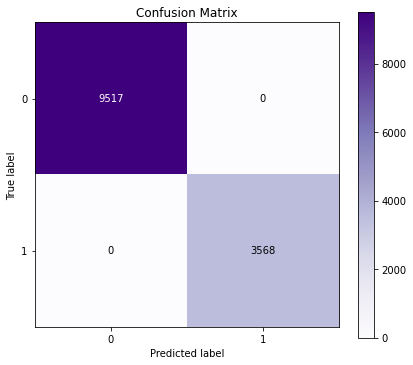

In [ ]:
import scikitplot as skplt
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, tree_pred, title="Confusion Matrix", ax=ax1, cmap='Purples')
plt.show()

### 2. Model Two: Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() #create object
forest.fit(x_train, y_train) #train the object

forest_pred = forest.predict(x_test)
forest_accuracy = accuracy_score(y_test, forest_pred) #calculate the accuracy score

print(f"Accuracy Score of Random Forest Algorithm is: {forest_accuracy}")
print("Accuracy Score of Random Forest Algorithm is: {}%".format(forest_accuracy*100))

Accuracy Score of Random Forest Algorithm is: 1.0
Accuracy Score of Random Forest Algorithm is: 100.0%


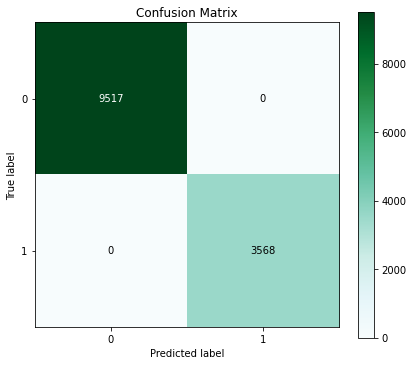

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, forest_pred, title="Confusion Matrix", ax=ax1, cmap='BuGn')
plt.show()

### 3. Model Three: Logistic Regression Algorithm





In [ ]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(x_train, y_train)

regression_pred = regression.predict(x_test)
regression_accuracy = accuracy_score(y_test, regression_pred)

print(f"Accuracy Score of Logistic Regression Algorithm is: {regression_accuracy}")
print("Accuracy Score of Logistic Regression Algorithm is: {}%".format(regression_accuracy*100))

Accuracy Score of Logistic Regression Algorithm is: 0.965303782957585
Accuracy Score of Logistic Regression Algorithm is: 96.5303782957585%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


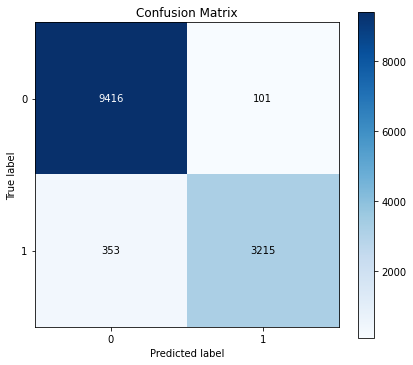

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, regression_pred, title="Confusion Matrix", ax=ax1, cmap='Blues')
plt.show()

### 4. Model Four: K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print(f"Accuracy Score of K-Nearest Neighbor Algorithm is: {knn_accuracy}")
print("Accuracy Score of K-Nearest Neighbor Algorithm is: {}%".format(knn_accuracy*100))

Accuracy Score of K-Nearest Neighbor Algorithm is: 0.8707680550248376
Accuracy Score of K-Nearest Neighbor Algorithm is: 87.07680550248375%


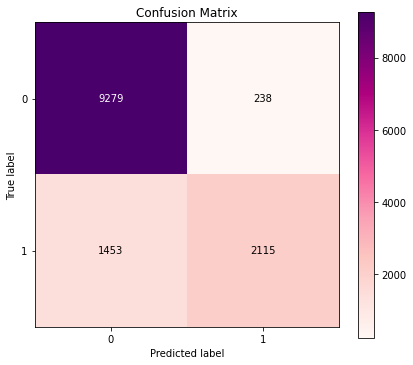

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, knn_pred, title="Confusion Matrix", ax=ax1, cmap='RdPu')
plt.show()

### 5. Model Five: Support Vector Machines(SVM) algorithm.

In [ ]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

print(f"Accuracy Score of SVM algorithm Algorithm is: {svc_accuracy}")
print("Accuracy Score of SVM algorithm Algorithm is: {}%".format(svc_accuracy*100))

Accuracy Score of SVM algorithm Algorithm is: 1.0
Accuracy Score of SVM algorithm Algorithm is: 100.0%


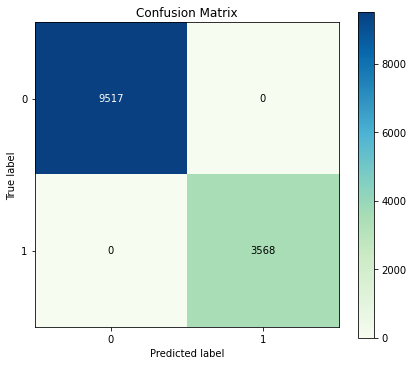

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, svc_pred, title="Confusion Matrix", ax=ax1, cmap='GnBu')
plt.show()

### 6. Model Six: Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print(f"Accuracy Score of Naive Bayes Algorithm is: {nb_accuracy}")
print("Accuracy Score of Naive Bayes Algorithm is: {}%".format(nb_accuracy*100))

Accuracy Score of Naive Bayes Algorithm is: 1.0
Accuracy Score of Naive Bayes Algorithm is: 100.0%


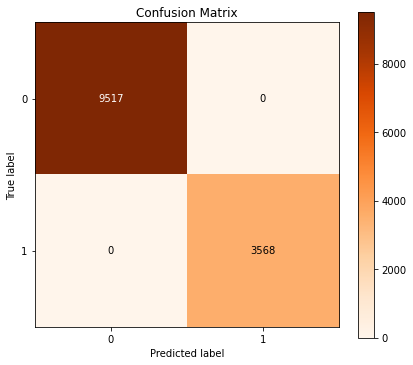

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, nb_pred, title="Confusion Matrix", ax=ax1, cmap='Oranges')
plt.show()

### 7. Model Seven: K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) 
kmeans.fit(x_train, y_train)

kmeans_pred = kmeans.predict(x_test)
kmeans_accuracy = accuracy_score(y_test, kmeans_pred)

print(f"Accuracy Score of K-Means Algorithm is: {kmeans_accuracy}")
print("Accuracy Score of K-Means Algorithm is: {}%".format(kmeans_accuracy*100))

Accuracy Score of K-Means Algorithm is: 0.6553305311425296
Accuracy Score of K-Means Algorithm is: 65.53305311425297%


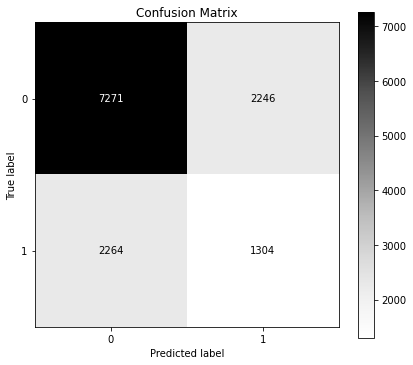

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, kmeans_pred, title="Confusion Matrix", ax=ax1, cmap='Greys')
plt.show()